# Machine Learning with Iris dataset

The personal aim of this work is discovery a simple machine learning use case, to be familiarized with concepts and the terminology.
The technical aim of the project is predict iris species from iris measurements.

## Sequential phases

### (1) Business understanding

You can type here a bit of the data historical (how it was measured, ...).
The goal of the project...

<br>

-------------------------

<br>

### (2) Data understanding

- Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
- Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
- Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
- Verify data quality: How clean/dirty is the data? Document any quality issues.

In [1]:
# Miscellaneous libraries
import numpy as np
import pandas as pd
from pathlib import Path

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Diretories and paths
root_dir = Path.cwd().parents[0]
data_dir = root_dir / 'in'

# Import dataframe
df = pd.read_csv(data_dir / 'iris.csv')
target_column = 'species' # the column with labels to predict

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###### There are no blank values, which is a good indicator.

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### There is no significant outliers based on min and max values, so the database seems reliable.

In [7]:
df.head(10) # First rows of the table

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


###### From 'species' column, it looks like the data is sorted, which requires that the next steps contain a random mixer.

In [8]:
df.tail() # Last rows of the table

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


###### From 'species' column, it confirms that the data is sorted.

In [9]:
df.isna().mean() # Percentage of null values per column

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

###### Conclusion: No blank values.

In [10]:
df[target_column].duplicated().sum() # Quantity of duplicated values

147

###### There are 147 duplicated values on the 'species' column, indicating that there are 3 species.

In [11]:
df[target_column].unique() # Unique values

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df[[target_column]].describe()

,species
count,150
unique,3
top,setosa
freq,50


###### There are 3 species: 'setosa', 'versicolor', 'virginica'.

In [13]:
df[target_column].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

###### We have 50 categories for each one of the species.

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

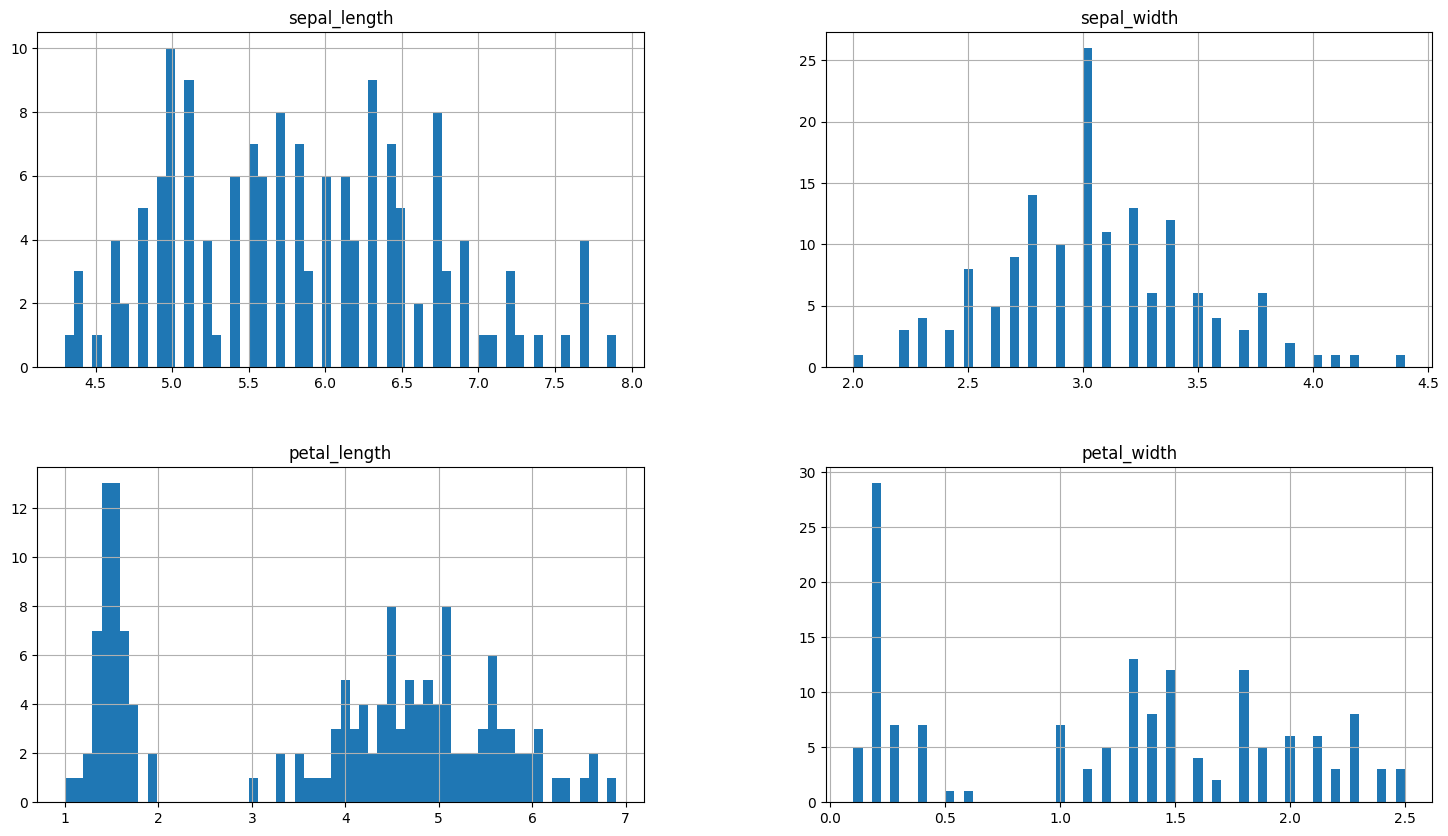

In [15]:
df.hist(bins = 60, figsize = (18,10))

Conclusion:
- We do not have tail-heavy (A heavy tailed distribution has a tail that's heavier than an exponential distribution (Bryson, 1974). In other words, a distribution that is heavy tailed goes to zero slower than one with exponential tails). 
- We do not have a large difference in scales.
- Dataset is ready to move on to the Data preparation step.

______________

### (3) Data preparation

- Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
- Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
- Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
- Integrate data: Create new data sets by combining data from multiple sources.
- Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

and

- Generate test design: Pending your modeling approach, you might need to split the data into training, test, and validation sets. (Note - It is common to generate test design on step 4, but it is done on step 3 to avoid data snooping bias)

###### The 'data snooping bias' is a statistical bias that appears when exhaustively searching for combinations of variables. It happens when we see the "same" data for a long time, and so we tend to choose one AI model or another, based on observations of the total set that will bias the choice of model.

#### (3.2.2) **Option 2: Classic one.**

In [16]:
# Separating names of columns
columns = df.keys().values.tolist()

features = columns[:-1]
output = columns[-1:]

print(features)
print(output)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
['species']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[output],  test_size = 0.3, random_state = 42)

Verificating train and test datasets.

In [18]:
print("X train has \n", X_train.count(), "values.\n\nX test has \n", X_test.count(),
"\n\nY train has \n", y_train.count(), "values.\n\nY test has \n", y_test.count())

type(X_train)

X train has 
 sepal_length    105
sepal_width     105
petal_length    105
petal_width     105
dtype: int64 values.

X test has 
 sepal_length    45
sepal_width     45
petal_length    45
petal_width     45
dtype: int64 

Y train has 
 species    105
dtype: int64 values.

Y test has 
 species    45
dtype: int64


pandas.core.frame.DataFrame

In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [20]:
y_train.head()

,species
81,versicolor
133,virginica
137,virginica
75,versicolor
109,virginica


In [21]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
train

,sepal_length,sepal_width,petal_length,petal_width,species
81,5.5,2.4,3.7,1.0,versicolor
133,6.3,2.8,5.1,1.5,virginica
137,6.4,3.1,5.5,1.8,virginica
75,6.6,3.0,4.4,1.4,versicolor
109,7.2,3.6,6.1,2.5,virginica
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,versicolor
106,4.9,2.5,4.5,1.7,virginica
14,5.8,4.0,1.2,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor


#### (3.3) Data exploration

Recapitulating, we have **X_train** and **y_train** to training. **train** is the complete dataframe (X and y). And, **X_test** and **y_test** to test. We use only **train** data in this part.

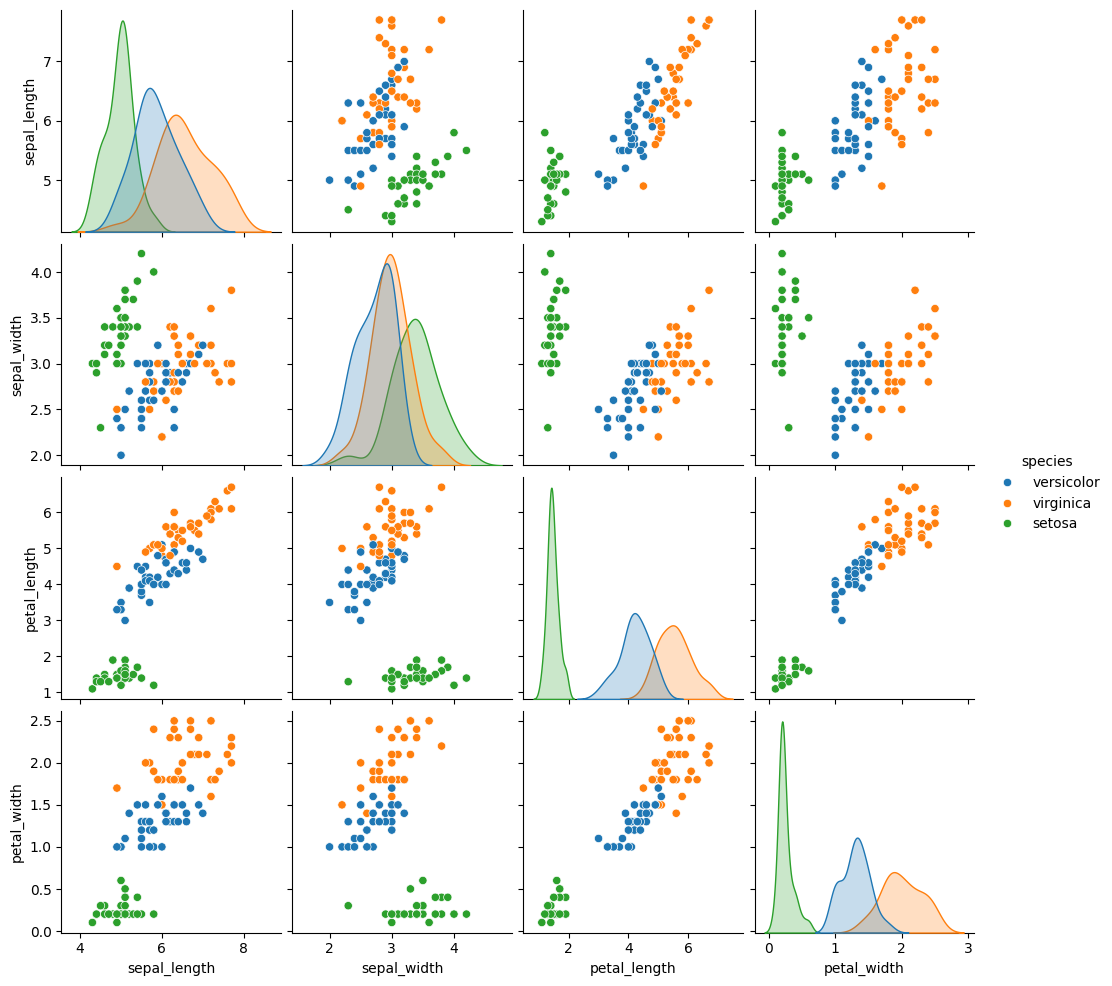

In [22]:
sns.pairplot(train, hue = target_column)

Conclusion:
- Train and test data was organized into random train and test subsets.
- From the fact of having the correct measurements and species for a certain amount of irises, a supervised learning model of the multi-class classification type will be proposed.

### (4) Modeling

- Select modeling techniques: Determine which algorithms to try (e.g. regression, neural net).

- Generate test design: To avoid snooping data bias (Géron, 2021), the split into training and test sets was done before data preparation and visualization.

- Build model: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.

- Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

#### (4.1) K-neighbors classifier model

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another (IBM, 2023).

A KNN model consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors.

##### (4.1.1) Introduction

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 40)

In [28]:
knn_model.fit(X_train.to_numpy(), y_train.iloc[:,0].to_numpy())

KNeighborsClassifier(n_neighbors=40)

In [29]:
knn_model.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(n_neighbors=40)>

The most important parameter of KNeighborsClassifier is the number of neighbors.

Less neighbors --> More complex.

More neighbors --> Less complex.

The fewer neighbors, the more complex the model, while more neighbors, the less complex. If we extrapolate this down to the number of data (where we would have all data being considered neighbors), we would always have the label that appears the most being the predicted label (and in the case of an equal number of labels, it is usually the order of the data* that will dictate which label will be predicted).

 *("Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data." (5))

##### (4.1.3) Predictions

In [30]:
y_train_pred = knn_model.predict(X_train)
print(y_train_pred)

['versicolor' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 '

/Users/standard/Documents/Scripts/ml_iris/venv3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [31]:
y_test_pred = knn_model.predict(X_test)
y_test_pred

/Users/standard/Documents/Scripts/ml_iris/venv3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

##### (4.1.4) Score

Evaluating predictions with training data.

In [32]:
y_train_asarray = y_train.iloc[:,0].to_numpy() # To transform the y_train, that is a dataframe, into numpy array (getting only first column)

Predicting and evaluating now the test data.

In [33]:
y_test_pred = knn_model.predict(X_test)
y_test_asarray = y_test.iloc[:,0].to_numpy() # To transform the y_train, that is a dataframe, into numpy array (getting only first column)
print(f"Test set score for Training data: {np.mean(y_train_asarray == y_train_pred)}")

Test set score for Training data: 0.9142857142857143


/Users/standard/Documents/Scripts/ml_iris/venv3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


##### (4.1.5) Evaluating performance

Other way to evaluate model performance related to classes. We can use it assuming that some classes are easier / harder to predict than others, and we are interested in evaluate it.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred, target_names = df[target_column].unique() ))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Conclusion: ....... are the modeling techniques we should apply to ...... .

### (5) Evaluation


- Evaluate results: Do the models meet the business success criteria? Which one(s) should we approve for the business?
- Review process: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
- Determine next steps: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.

###### Conclusion: ....... is a model that meets the business objectives.

### (6) Deployment – How do stakeholders access the results?

- Plan deployment: Develop and document a plan for deploying the model.
- Plan monitoring and maintenance: Develop a thorough monitoring and maintenance plan to avoid issues during the operational phase (or post-project phase) of a model.
- Produce final report: The project team documents a summary of the project which might include a final presentation of data mining results.
- Review project: Conduct a project retrospective about what went well, what could have been better, and how to improve in the future.

###### Conclusion: Stakeholders can access results from an UI to be developed, and an .exe.

## Conclusion

- About Machine Learning algorithm

The system will not perform well if your training set is too small, or if the data is not representative, noisy, or polluted with irrelevant features (garbage in, garbage out). Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).

If the training error is low (i.e., your model makes few mistakes on the training set) but the generalization error is high, it means that the model is overfitting the training data.

## References
- (1) Introduction to Machine Learning with Python (2017, Andreas Muller, Sarah Guido)
- (2) Hands-On Machine Learning with Scikit-learn, keras and tensorflow (2021, Aurélien Géron)
- (3) https://pbpython.com/categorical-encoding.html
- (4) https://www.ibm.com/topics/knn
- (5) https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<br>

-------------------------

<br>

* version : 0.0.1
* last update (yyyy-mm-dd):  2024-01-20
* author: [Victor M Santome]